# Работа 1.4.1. Изучение колебаний физического маятника
---
Образец обработки экспериментальных данных
----------------------------------------

Данный документ представляет собой пример обработки результатов измерений и построения графиков с помощью библиотек языка Python. В работе измеряется период колебаний физического маятника в форме сплошного стержня. Изучается зависимость периода от расстояния до точки подвеса. По измеренной зависимости проверяется теоретическая модель и вычисляется ускорение свободного падения.

In [1]:
# импорт библиотек 
import numpy as np # для обработки данных
import matplotlib.pyplot as plt # для построения графиков

## Определение погрешности измерения времени. Выбор оптимального времени измерений.

Измерим время \$n = 20$ колебаний маятника при некотором фиксированном положении подвесной призмы. Повторим измерения 8 раз и вычислим среднеквадратичное отклонение.

Результаты предварительных измерений:

In [2]:
t0 = [30.55, 30.78, 30.75, 30.64, 30.57, 30.71, 30.51, 30.65] # время 20 колебаний, [с]

Вычисляем случайную погрешность как среднеквадратичое отклонение результатов от среднего:
\begin{equation}
\sigma_t = \sqrt{\frac{1}{N-1} \sum (t_i - \bar{t})^2}
\end{equation}

In [3]:
mean = np.mean(t0) # среднее
N = len(t0) # число опытов
sigma_t = np.sqrt( 1 / (N - 1) * np.sum( (t0 - mean)**2 ) ) 
# тот же результат даёт встроенная функция 
# np.std(t0, ddof=1)
print("t_mean = ", mean, "; sigma_t = %.3f" % sigma_t)

t_mean =  30.645 ; sigma_t = 0.097


Таким образом, случайная погрешность измерения полного времени составила $\sigma_t = 0{,}10$ с (инструментальная погрешность секундомера 0,01 c и ей можно пренебречь по сравнению с $\sigma_t$). 

Будем считать, что основной источник погрешности измерения времени -- реакция экспериментатора. Предположим, что задержка реакции человека практически  зависит от полного времени измерения. Тогда исходя требуемой для опыта относительной точности $\varepsilon = 0{,}5$%, вычислим необходимое полное время измерений:
\begin{equation}
t = \frac{\sigma_t}{\varepsilon} 
\approx 20\;с
\end{equation}

Таким образом, при периоде $T \sim1{,}5$ с достаточно провести измерение времени $n = \frac{t}{T} \sim 13$ колебаний.

## Измерение зависимости периода колебаний от положения подвесной призмы

Проводим измерение времени $t$ для $n$ колебаний для различных расстояний $a$ (расстояние от подвесной призмы до центра масс стержня).

### Данные эксперимента

Длина стержня:

In [4]:
l = 1.000 # м

Расстояния до подвеса (от центра масс стержня):

In [5]:
a = np.array([460.0, 420.0, 381.0, 360.0, 320.0, 291.0, 250.0, 210.0, 180.0, 140.0, 100.0, 70.0]) # [мм]
a = a / 1e3 # перевод в [м]
N = len(a) # число точек

Количество измеренных колебаний:

In [6]:
n = np.array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 10, 10])

Измеренное время, [с]:

In [7]:
t = np.array([24.16, 23.63, 23.30, 23.10, 23.05, 22.95, 23.01, 23.44, 24.15, 25.88, 19.44, 22.69])

Периоды колебаний, [с]:

In [8]:
T = np.array(t) / n
print (T)

[1.61066667 1.57533333 1.55333333 1.54       1.53666667 1.53
 1.534      1.56266667 1.61       1.72533333 1.944      2.269     ]


### Оценка погрешностей исходных данных

Погрешности измерений: для длины $\sigma_a = 0{,}5$ мм (половина цены деления линейки), для периода $\sigma_T = \sigma_t/t\cdot T=\sigma_t / n$

In [9]:
sigma_a = 0.5e-3
sigma_T = sigma_t / t * T
print(sigma_T)

[0.00649298 0.00649298 0.00649298 0.00649298 0.00649298 0.00649298
 0.00649298 0.00649298 0.00649298 0.00649298 0.00973946 0.00973946]


### Предварительное вычисление g

Если предположить, что справедлива теоретическая зависимость 
\begin{equation}
T = 2\pi \sqrt{ \frac{l^2/12 + a^2}{g a} },
\end{equation}
то ускорение свободного падения можно найти непосредственно по данной формуле. Выразим отсюда g:

In [10]:
gs = 4 * np.pi**2 * ( l**2 / 12 + a**2 ) / (a * T**2)
gm = np.mean(gs)
print(gs)
print("g_mean = %.3f" % gm)

[9.75695771 9.83769175 9.81252714 9.84599128 9.70376499 9.7371132
 9.78646419 9.81049202 9.79250814 9.75083286 9.749986   9.66552373]
g_mean = 9.771


Случайную погрешность среднего найдём как стандартное отклонение, делённое на $\sqrt{N}$:

In [11]:
sigma_gm = np.std(gs) / np.sqrt(N)
print("sigma_gm = %.3f" % sigma_gm)

sigma_gm = 0.015


Окончательный результат по данному методу:
\begin{equation}
\bar{g} = 9{,}771 \pm 0,015\; м/с^2
\end{equation}

Заметим, что данный результат _не может считаться надёжным_ , поскольку справедливость теоретичской зависимости ещё не была проверена. Кроме того, усреднение _разнородных_ измерений (при разных значениях параметра $a$) в общем случае **не является корректным**. 

### Построение графика $T(a)$ и определение минимума периода
Построим график зависимости периода колебаний от положений призмы $T(a)$

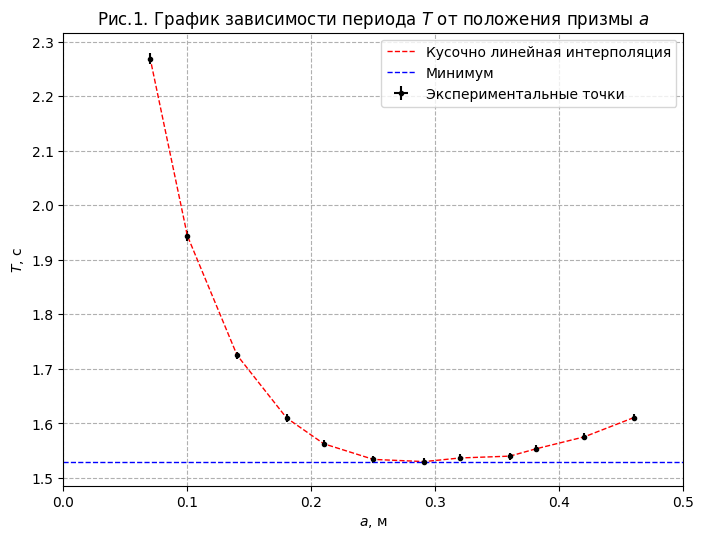

In [12]:
plt.figure(figsize=(8,6), dpi=100) # размер графика
plt.ylabel("$T$, с") # подписи к осям
plt.xlabel("$a$, м")
plt.xlim([0, 0.5])
plt.title('Рис.1. График зависимости периода $T$ от положения призмы $a$') # заголовок
plt.grid(True, linestyle="--") # пунктирная сетка
plt.errorbar(a, T, xerr=sigma_a, yerr=sigma_T, fmt=".k", label="Экспериментальные точки") # точки с погрешностями
plt.plot(a, T, "--r", linewidth=1, label="Кусочно линейная интерполяция") # интерполяция
plt.plot([0.00,0.5], [1.53, 1.53], "--b", linewidth=1, label="Минимум") # минимум
plt.legend() # легенда

По графику визуально определяем приблизительное положение минимума: $T_{min} \approx 1{,}53 \pm 0{,}2$ с, $a_{min} \approx 280 \pm 30$ мм.

Теоретическое значение минимума: $a_{min} = \frac{l}{\sqrt{12}} \approx 289$ мм (где $l = 1000$ мм -- длина стержня) совпадает с экспериментальным в пределах погрешности.

## Построение линеаризованного графика и определение ускорения свободного падения

Согласно теории, зависимость периода от положения призмы может быть представлена в виде
\begin{equation}
T^2 a = \frac{4\pi^2}{g} \left(\frac{l^2}{12} + a^2\right).
\end{equation}

Построим график в координатах $u(v)$, где $u= T^2 a$ и $v = a^2$. Тогда теоретическая зависимость примет вид
\begin{equation}
u = k v + b,\quad где \quad k = \frac{4\pi^2}{g},\; b = \frac{\pi^2 l^2}{3g}.
\end{equation}

In [13]:
u = T**2 * a
v = a**2
print("u = ", u, "\nv = ", v)

u =  [1.19335367 1.04230355 0.91929373 0.853776   0.75563022 0.6812019
 0.588289   0.51280469 0.466578   0.41674852 0.3779136  0.36038527] 
v =  [0.2116   0.1764   0.145161 0.1296   0.1024   0.084681 0.0625   0.0441
 0.0324   0.0196   0.01     0.0049  ]


### Оценка погрешностей точек

Предварительно рассчитаем погрешности каждой точки. Согласно формулам расчёта косвенных погрешностей, имеем $\sigma_u/u = \sqrt{(2\sigma_T/T)^2 + (\sigma_a/a)^2}$, $\sigma_v = 2 a \sigma_a$:

In [14]:
sigma_u = u * np.sqrt(4 * (sigma_T / T)**2 + (sigma_a/a)**2)
sigma_v = 2 * a * sigma_a

Вычислим относительные погрешности и убедимся, что все они малы:

In [15]:
print(sigma_u/u, '\n', sigma_v/v) # относительные погрешности

[0.00813541 0.00832882 0.00846243 0.00854605 0.00859396 0.00865972
 0.00869847 0.00864448 0.00853073 0.00833098 0.01119825 0.01116778] 
 [0.00217391 0.00238095 0.00262467 0.00277778 0.003125   0.00343643
 0.004      0.0047619  0.00555556 0.00714286 0.01       0.01428571]


Видим, что относительная погрешность величины $u$ составляет от 0,8% до 1,1%, а величины $v$ --- от 0,2% до 1,4%. Наименее точные измерения соответствуют наименьшим значениям $a$.

Строим предварительный график:

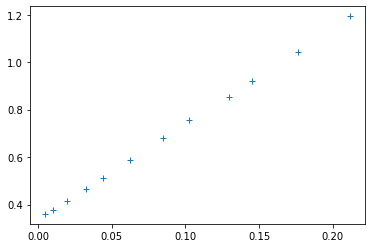

In [16]:
plt.plot(v, u, "+")

Видно, что график действительно имеет вид, близкий к прямой линии.

Найдём коэффициенты наилучшей прямой по методу наименьших квадратов (МНК). Для простоты погрешности всех точек будем считать приблизительно одинаковыми. Тогда можно воспользоваться формулами
\begin{equation}
k = \frac{\overline{uv}- \bar{u}\bar{v}}{\bar{v^2}-\bar{v}^2}, \quad b = \bar{u} - k \bar{v}
\end{equation}

In [17]:
mu = np.mean(u) # средее
mv = np.mean(v)
mv2 = np.mean(v**2) # средний квадрат
mu2 = np.mean(u**2)
muv = np.mean (u * v) # среднее от произведения
k = (muv - mu * mv) / (mv2 - mv**2)
b = mu - k * mv
print("k = ", k, ", b = ", b)

k =  4.018295033427713 , b =  0.33801567301035323


_Заметим, что результат совпадает с выводом встроенной в пакет_ numpy _функции_ polyfit _(аппроксимация зависимости полиномом по методу МНК):_

In [18]:
np.polyfit(v, u, 1)

array([4.01829503, 0.33801567])

Изобразим на графике экспериментальные точки и полученную аппроксимирующую зависимость.

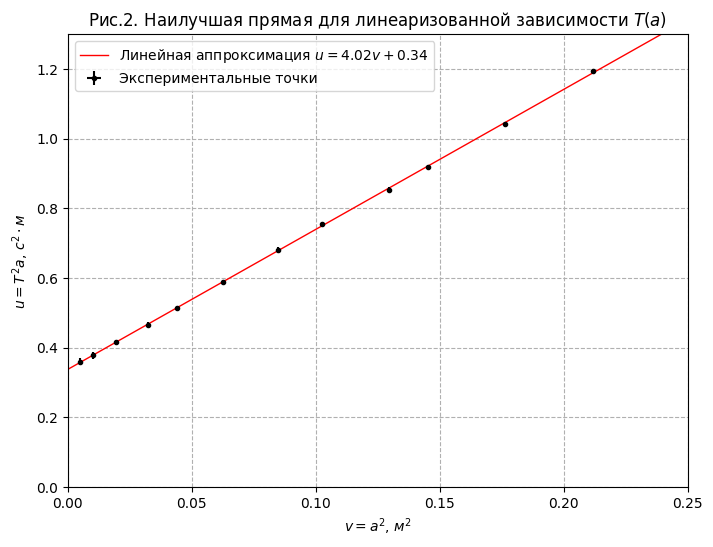

In [19]:
plt.figure(figsize=(8,6), dpi=100) # размер графика
plt.ylabel("$u=T^2 a$, $с^2 \cdot м$") # подписи к осям
plt.xlabel("$v=a^2$, $м^2$")
plt.title('Рис.2. Наилучшая прямая для линеаризованной зависимости $T(a)$') # заголовок графика
plt.grid(True, linestyle="--") # сетка
plt.axis([0,0.25,0,1.3]) # масштабы осей
x = np.array([0., 1]) # две точки аппроксимирующей прямой
plt.plot(x, k * x + b, "-r",linewidth=1, label="Линейная аппроксимация $u = %.2f v + %.2f$" % (k, b)) # аппроксимация
plt.errorbar(v, u, xerr=sigma_a, yerr=sigma_T, fmt="ok", label="Экспериментальные точки", ms=3) # точки с погрешностями
plt.legend() # легенда

Вычислим ускорение свободного падения:

In [20]:
g = (4 * np.pi**2) / k
print("g = %.3f" % g)

g = 9.825


По величине свободного слагаемого проверим длину стержня: 

In [21]:
L = (3 * b * g) / np.pi**2
print("L = %.3f м" % L)

L = 1.009 м


Видно, что она совпадает с измеренной непосредственно $l=1000$ мм с точностью 0,9% (в пределах погрешности опыта).

Вычислим случайные погрешности определения коэффициентов прямой: 
\begin{equation}
\sigma_k = \sqrt{\frac{1}{N-2} \left(\frac{\overline{y^2}-\bar{y}^2}{\overline{x^2} - \bar{x}^2}-k^2\right)},\qquad \sigma_b = \sigma_k \sqrt{\overline{x^2}}
\end{equation}
и из них --- случайную погрешность измерения $g$ и $L$.

In [22]:
N = len(v) # число точек
sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
sigma_b = sigma_k * np.sqrt(mv2)
sigma_g = sigma_k / k * g
sigma_L = L * np.sqrt( (sigma_b / b)**2 + (sigma_g / g)**2 )
print("sigma_k = %.3f, sigma_b = %.3f" % (sigma_k, sigma_b))
print("sigma_g = %.3f, sigma_L = %.3f" % (sigma_g, sigma_L))

sigma_k = 0.016, sigma_b = 0.002
sigma_g = 0.040, sigma_L = 0.007


Окончательный результат для ускорения свободного падения:
    \begin{equation}
    g = 9{,}82 \pm 0{,}04 \; м/с^2.
    \end{equation}
Длина стержня, определённая как параметр теоретической зависимости:
\begin{equation}
L = 1009 \pm 7\; мм.
\end{equation}

### Проверка качества аппроксимации по сумме хи-квадрат

Для проверки точности аппроксимации, вычислим сумму $\chi^2$:
\begin{equation}
\chi^2 = \sum \left(\frac{\Delta u}{\sigma_u}\right)^2
\end{equation}

In [23]:
chi2 = np.sum( ((u - (k * v + b)) / sigma_u)**2 )
doF = N -2
print("chi_2 = ", chi2, ", chi_2/doF = ", chi2 / doF)

chi_2 =  3.1652710916285764 , chi_2/doF =  0.31652710916285764


Нормированная (на число степеней свободы) величина $\chi^2/(N-2) \approx 0{,}3 < 1$ показывает, что выполненная аппроксимация является удовлетворительной (при этом оценка погрешностей по вертикальной оси несколько завышена).

Вероятность $P$ того, что в опыте обнаружено отклонение от теоретической зависимости, можно вычислить по значению "распределения хи-квадрат". Данная функция распределения реализована в пакете scipy.stats.

In [24]:
import scipy.stats
# "кумулятивная функция распределения" (cdf) задаёт вероятность того, что величина chi^2 случано превысит заданное значение (при заданном числе степеней свободы doF)
p_value = scipy.stats.chi2.cdf(chi2, doF) 
print("P-value = %.1f%%" % (p_value * 100))

P-value = 2.3%


Таким образом, вероятность того, что в опыте обнаружено отклонение от теории, составляет $P=2{,}3\%$.

## ДОПОЛНЕНИЕ. Нелинейная аппроксимация по методу минимума хи-квадрат

_Это дополнение не является обязательной частью учебного задания. Здесь продемонстрировано, как можно обработать результаты эксперимента, не прибегая к линеаризации графика. Мы вычислим параметры эксперимента с помощью нелинейного метода минимизации суммы хи-квадрат (известный также под названием "МНК с весами"), используя функцию_ curve_fit _пакета_ scipy.optimize.

In [25]:
from scipy.optimize import curve_fit

Зададим теоретическую зависимость как функцию $T(a)$, считая величины $g$ и $l$ параметрами модели:
\begin{equation}
T(a ; g, l) = 2\pi \sqrt{\frac{l^2/12 + a^2}{g a}}
\end{equation}

In [26]:
f = lambda x, g, l: 2 * np.pi * np.sqrt( (l**2 / 12 + x**2) / (g * x) )

Воспользуемся функцией curve_fit для подбора оптимальных параметров. Данный метод численно минимизирует сумму 
\begin{equation}
\sum_{i=1}^N \left(\frac{T_i - T(a_i;g,l)}{\sigma_{Ti}}\right)^2
\end{equation}
Результатом является набор оптимальных параметров $(g, l)$, и "ковариационная матрица" (диагональные элементы которой равны дисперсии соответствующего параметра).

In [27]:
popt, pcov = curve_fit(f, a, T, sigma=sigma_T) # sigma задаёт погрешности каждой точки по оси ординат

In [28]:
# оптимальные параметры содержаться в массиве popt
g, l = popt
print(g, l)

9.839361842336142 1.0060669740525674


In [29]:
# Случайные погрешности параметров -- это диагональные элементы "ковариационной" матрицы pcov
sigma_g, sigma_l = np.sqrt(np.diag(pcov))
print("sigma_g = ", sigma_g, ", sigma_l = ", sigma_l)

sigma_g =  0.04020866077908003 , sigma_l =  0.003369125054261992


Изобразим на графике результат нелинейной аппроксимации, наложенный на экспериментальные точки.

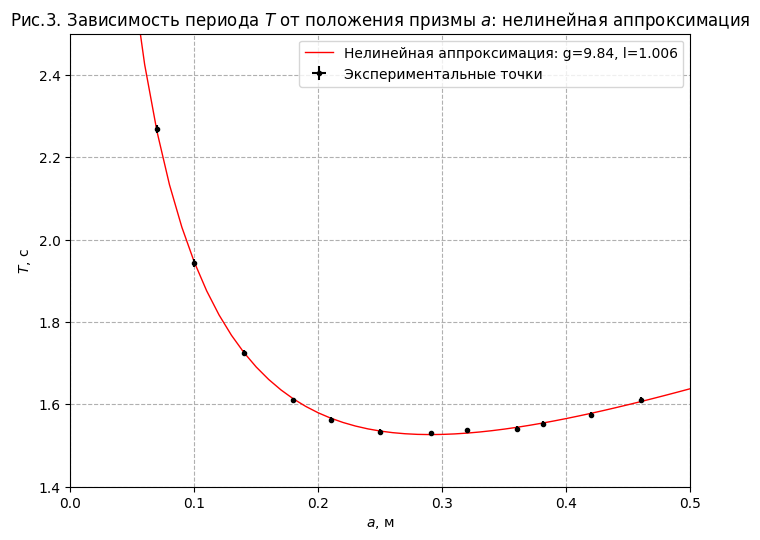

In [30]:
plt.figure(figsize=(8,6), dpi=100)
plt.ylim(1.4, 2.5)
plt.xlim(0., 0.5)
plt.ylabel("$T$, с")
plt.xlabel("$a$, м")
plt.title('Рис.3. Зависимость периода $T$ от положения призмы $a$: нелинейная аппроксимация')

plt.grid(True, linestyle="--")

x = np.linspace(0.01, 0.5, 50)
plt.plot(x, f(x, g, l), 'r-', linewidth=1, label='Нелинейная аппроксимация: g=%.2f, l=%.3f' % (g, l))

plt.errorbar(a, T, xerr=sigma_a, yerr=sigma_T, fmt=".k", label='Экспериментальные точки')
plt.legend()

Результат нелинейной аппроксимации:
\begin{equation}
g = 9{,}84 \pm 0{,}04\; \text{м}/\text{с}^2,\qquad l = 1{,}006 \pm 0{,}003\;\text{м}
\end{equation}

Из теоретической зависимости при найденых $g$ и $l$ определим минимальное значение периода:

In [31]:
T_min = f(l**2/np.sqrt(12), g, l)
print("T_min = %.3f с" % T_min)

T_min = 1.527 с


Вычислим сумму $\chi^2$ и её нормировку на число степеней свободы:

In [32]:
chi2 = np.sum( ( (T - f(a, g, l)) / sigma_T )**2 )
print("chi_2 = ", chi2, ", chi_2/doF = ", chi2 / (len(a)-2))
p_value = scipy.stats.chi2.cdf(chi2, doF) 
print("P-value = %.1f%%" % (p_value * 100))

chi_2 =  3.531066443314955 , chi_2/doF =  0.3531066443314955
P-value = 3.4%


Поскольку $\chi^2 / (N - 2) \lesssim 1$, аппроксимация является удовлетворительной. Оценка величины погрешностей $\sigma_T$ несколько завышена.